In [ ]:
!pip install -q tfds-nightly
!pip install -q tensorflow-model-optimization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 24.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import numpy as np
import cv2
import PIL

from pprint import pprint

In [ ]:
!wget -O lena_std.tif http://www.lenna.org/lena_std.tif
!wget -O graf.png https://github.com/opencv/opencv/raw/master/samples/data/graf1.png

--2023-05-22 14:43:46--  http://www.lenna.org/lena_std.tif
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786572 (768K) [image/tiff]
Saving to: ‘lena_std.tif’

lena_std.tif        100%[===================>] 768.14K  3.87MB/s    in 0.2s    

2023-05-22 14:43:47 (3.87 MB/s) - ‘lena_std.tif’ saved [786572/786572]

--2023-05-22 14:43:47--  https://github.com/opencv/opencv/raw/master/samples/data/graf1.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/graf1.png [following]
--2023-05-22 14:43:47--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/graf1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.

Skrypt do wyżwietlania obrazów BGR oraz Grayscale.

In [ ]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

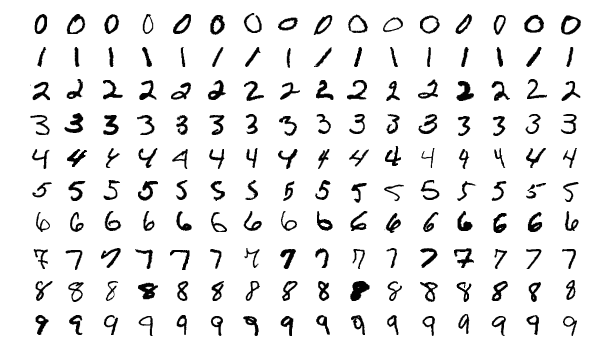

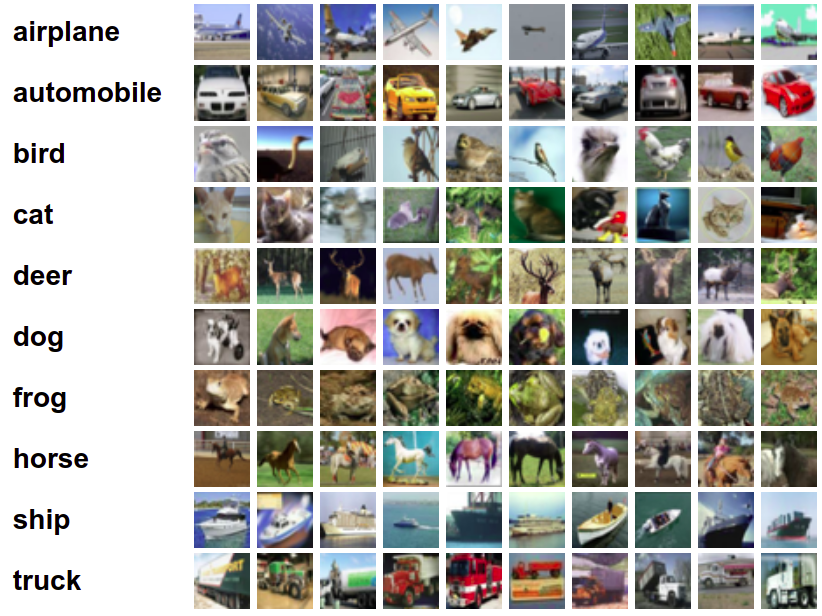

In [ ]:
!tfds build mnist
!tfds build cifar10

2023-05-22 14:43:51.556110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO[build.py]: Loading dataset mnist from imports: tensorflow_datasets.image_classification.mnist
2023-05-22 14:43:53.506005: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "NOT_FOUND: Error executing an HTTP request: HTTP response code 404".
INFO[dataset_info.py]: Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: mnist/3.0.1
INFO[dataset_info.py]: Load dataset info from /tmp/tmpdoj4yyv7tfds
INFO[dataset_info.py]: Fields info.[citation, splits, supervised_keys, module_name] from disk and from code do not match. Keeping the one from code.
INFO[build.py]: download_and_prepare for dataset mnist/3.0.1...
INFO[datas

In [ ]:
train_ds_mnist = tfds.load('mnist', split='train', shuffle_files=True)

print(train_ds_mnist)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [ ]:
_train_ds_mnist = train_ds_mnist \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(4)

data = next(iter(_train_ds_mnist))

print(data['image'].shape, data['label'].shape)

(32, 28, 28, 1) (32,)


In [ ]:
images = data['image'].numpy()

imshow(np.concatenate(images, 1))

In [ ]:
builder = tfds.builder('mnist')
builder.download_and_prepare()

train_ds_mnist = builder.as_dataset(split='train', shuffle_files=True)

print(train_ds_mnist)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [ ]:
_train_ds_mnist = train_ds_mnist \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(4)

data = next(iter(_train_ds_mnist))

print(data['image'].shape, data['label'].shape)

(32, 28, 28, 1) (32,)


In [ ]:
images = data['image'].numpy()

imshow(np.concatenate(images, 1))

In [ ]:
train_ds_mnist, info = tfds.load('mnist', split='train', with_info=True)

print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


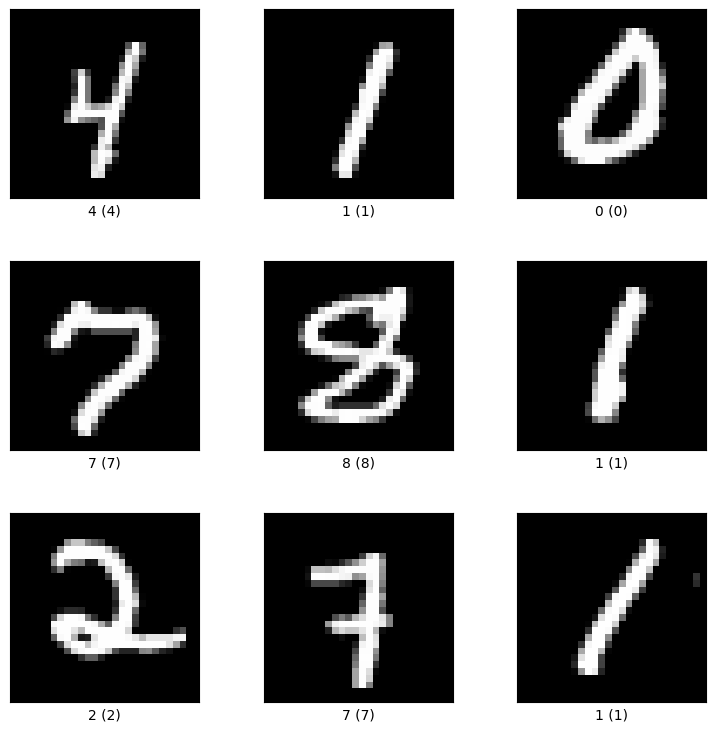

In [ ]:
fig = tfds.show_examples(train_ds_mnist, info)

In [ ]:
tfds.as_dataframe(train_ds_mnist.take(4), info)

,image,label
0,,4
1,,1
2,,0
3,,7


In [ ]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
print(hub_module)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f07a7c4ce80>


In [ ]:
print(len(hub_module.variables), '\n', hub_module.variables[0])

507 
 <tf.Variable 'InceptionV3/Mixed_6c/Branch_1/Conv2d_0a_1x1/BatchNorm/moving_mean:0' shape=(160,) dtype=float32, numpy=
array([-5.11866249e-02, -4.15960640e-01, -5.42337112e-02, -9.52912569e-01,
        1.12755015e-01, -4.91311461e-01, -9.68312547e-02,  2.76206225e-01,
       -6.91971108e-02, -7.65123405e-03, -4.38524847e-04, -3.26322585e-01,
       -6.61193490e-01, -3.14499706e-01, -1.23079263e-01,  1.56004697e-01,
       -1.74204022e-01, -3.30719858e-01,  4.64836694e-02, -1.51352556e-02,
       -3.87275338e-01, -4.55238968e-01, -4.77899522e-01, -9.70206037e-02,
       -2.51840562e-01, -3.16165477e-01, -3.09167862e-01,  5.24905980e-01,
       -1.86437607e-01, -1.02515258e-01, -2.52395034e-01, -4.77699459e-01,
        2.68790662e-01, -1.82814509e-01, -2.29982823e-01, -6.44652322e-02,
       -1.15103513e-01,  1.55370921e-01, -4.68799055e-01, -1.57561883e-01,
        1.09915137e-01, -2.55104125e-01, -1.36623085e-01, -4.15635347e-01,
       -2.40657702e-01, -3.88806820e-01, -1.2368219

In [ ]:
lena_tf = tf.constant(lena.astype(np.float32)[np.newaxis, ...] / 255.)
graf_tf = tf.constant(graf.astype(np.float32)[np.newaxis, ...] / 255.)

graf_tf = tf.image.resize(graf_tf, (256, 256))

print(lena_tf.shape, graf_tf.shape)


(1, 512, 512, 3) (1, 256, 256, 3)


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 85607, done.
remote: Counting objects: 100% (1206/1206), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 85607 (delta 748), reused 1151 (delta 725), pack-reused 84401
Receiving objects: 100% (85607/85607), 598.68 MiB | 33.93 MiB/s, done.
Resolving deltas: 100% (61250/61250), done.


In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/models"

In [ ]:
!python3 /content/models/official/vision/image_classification/mnist_main.py \
  --model_dir=/content/results/mnist \
  --data_dir=/content/data/mnist \
  --train_epochs=10 \
  --distribution_strategy=one_device \
  --num_gpus=1 \
  --download

python3: can't open file '/content/models/official/vision/image_classification/mnist_main.py': [Errno 2] No such file or directory


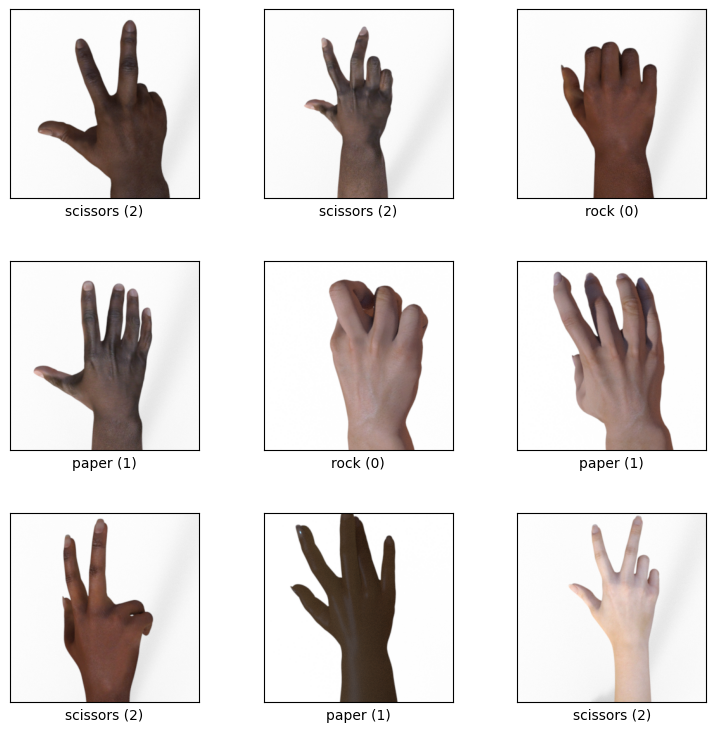

In [ ]:
train_ds, info = tfds.load('rock_paper_scissors', split='train', with_info=True)
fig = tfds.show_examples(train_ds, info)

In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer('https://tfhub.dev/tensorflow/efficientnet/b0/classification/1'),
  tf.keras.layers.Dense(3, activation='sigmoid'),
])
model.build((None, None, None, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1000)              5330564   
                                                                 
 dense_1 (Dense)             (None, 3)                 3003      
                                                                 
Total params: 5,333,567
Trainable params: 3,003
Non-trainable params: 5,330,564
_________________________________________________________________


,image,label
0,,2 (scissors)
1,,2 (scissors)
2,,0 (rock)
3,,1 (paper)
4,,0 (rock)
5,,1 (paper)
6,,2 (scissors)
7,,1 (paper)
8,,2 (scissors)
9,,2 (scissors)

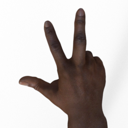
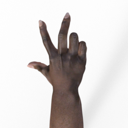
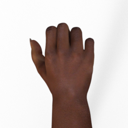
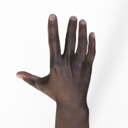
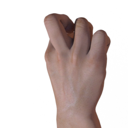
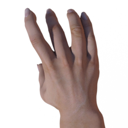
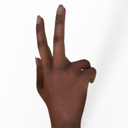
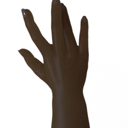
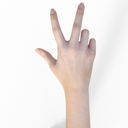
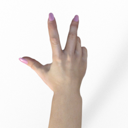
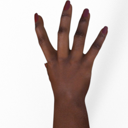
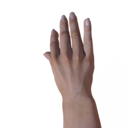
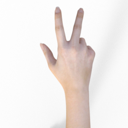
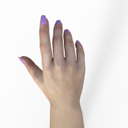
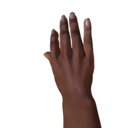
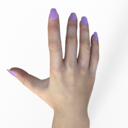
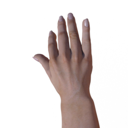
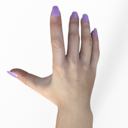
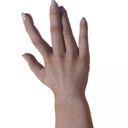
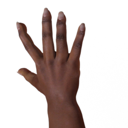

In [ ]:
images = tfds.as_dataframe(train_ds.take(20), info)
images

In [ ]:
labels = {0: "rock", 1: "paper", 2: "scissors"}
for i in range(10):
  predicted = int(tf.argmax(model(tf.expand_dims(images.image[i], 0))[0]))
  print(f'true: {labels[images.label[i]]}, predicted: {labels[predicted]}')

true: scissors, predicted: paper
true: scissors, predicted: rock
true: rock, predicted: rock
true: paper, predicted: paper
true: rock, predicted: paper
true: paper, predicted: scissors
true: scissors, predicted: scissors
true: paper, predicted: rock
true: scissors, predicted: paper
true: scissors, predicted: scissors
